In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('heart_data.csv')
df.head

<bound method NDFrame.head of      rest_bp  chest_pain  thalassemia  age  fasting_bs  max_hr  \
0        106           3            0   67           0     142   
1        120           2            0   50           0     158   
2        126           3            2   35           0     156   
3        150           3            2   63           0     154   
4        140           3            2   46           0     120   
..       ...         ...          ...  ...         ...     ...   
292      130           2            2   62           0      97   
293      100           3            0   58           0     122   
294      138           3            0   59           0     182   
295      130           3            2   56           1     103   
296      150           3            2   50           0     128   

     exercise_angina  gender  st_slope  cholesterol  st_depression  rest_ecg  \
0                  0       0         0          223            0.3         0   
1                

In [3]:
df.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,2.158249,0.835017,54.542088,0.144781,149.599327,0.326599,0.676768,0.602694,247.350168,1.055556,0.996633,0.676768,0.461279
std,17.762806,0.964859,0.956690,9.049736,0.352474,22.941562,0.469761,0.468500,0.618187,51.997583,1.166123,0.994914,0.938965,0.499340
min,94.000000,0.000000,0.000000,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,2.000000,0.000000,48.000000,0.000000,133.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,2.000000,0.000000,56.000000,0.000000,153.000000,0.000000,1.000000,1.000000,243.000000,0.800000,1.000000,0.000000,0.000000
75%,140.000000,3.000000,2.000000,61.000000,0.000000,166.000000,1.000000,1.000000,1.000000,276.000000,1.600000,2.000000,1.000000,1.000000
max,200.000000,3.000000,2.000000,77.000000,1.000000,202.000000,1.000000,1.000000,2.000000,564.000000,6.200000,2.000000,3.000000,1.000000


In [4]:
name = df.head

In [5]:
df.shape

(297, 14)

In [6]:
df['age']

0      67
1      50
2      35
3      63
4      46
       ..
292    62
293    58
294    59
295    56
296    50
Name: age, Length: 297, dtype: int64

In [7]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isna().sum().sort_values(ascending = False).head(10)

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
dtype: int64

<Axes: >

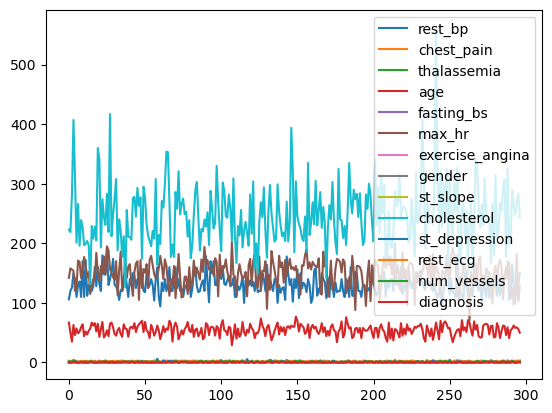

In [11]:
df.plot()
#plt.show()

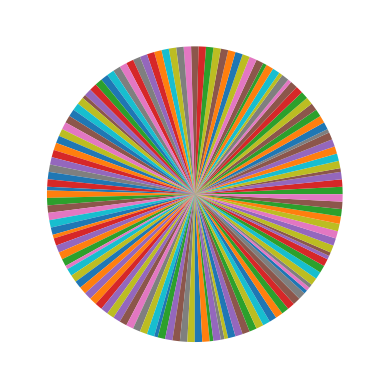

In [12]:
x = 'age'
y = 'thalassemia'
labels = []
plt.pie(df['thalassemia'])
plt.show()

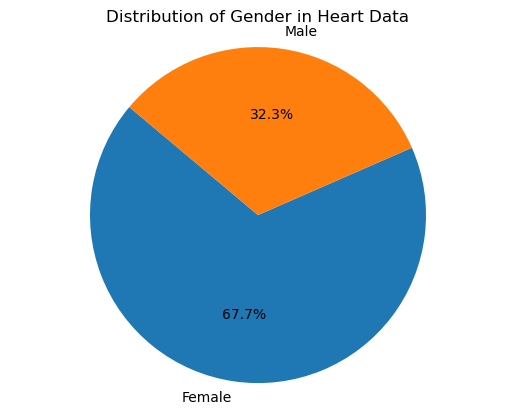

In [13]:
gender_counts = df['gender'].value_counts()
labels = ['Female', 'Male']
sizes = gender_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gender in Heart Data')
plt.show()

In [14]:
print(plt.style.available)
#plt.savefig('image.png')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


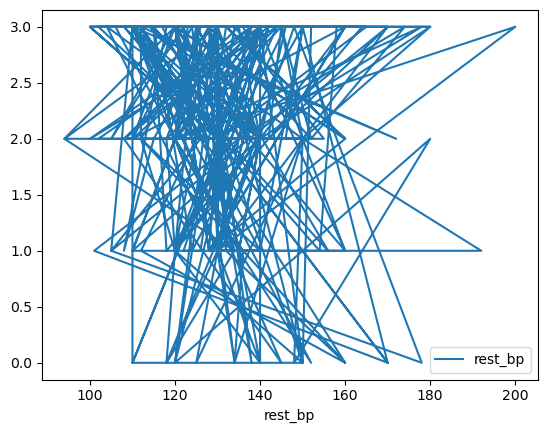

In [15]:
df.plot(x='rest_bp', y='chest_pain', kind='line')
plt.legend(['rest_bp', 'chest_pain'])
plt.show()

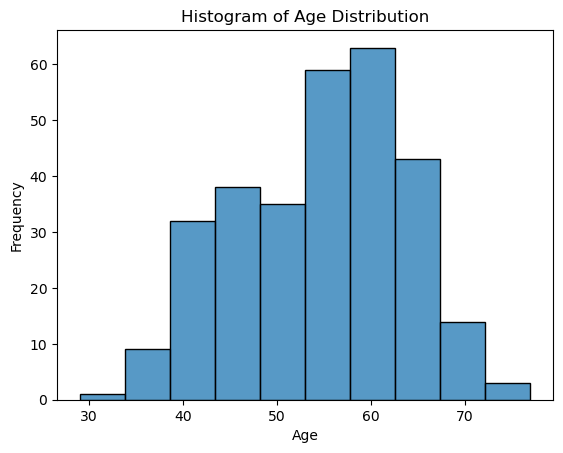

In [16]:
sns.histplot(data=df, x='age', bins=10)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [18]:
"sklearn.model_selection.train_test_split"

'sklearn.model_selection.train_test_split'

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the CSV file
data = pd.read_csv('heart_data.csv')

# Define the features (X) and the target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train",X_train)
print("Y_train",y_train)

X_train      rest_bp  chest_pain  thalassemia  age  fasting_bs  max_hr  \
266      160           0            0   69           1     131   
37       150           2            2   57           1     173   
16       128           1            0   62           1     140   
253      115           3            0   43           0     181   
144      148           3            2   61           0     161   
..       ...         ...          ...  ...         ...     ...   
188      152           3            2   57           0      88   
71       125           3            2   60           0     141   
106      128           3            2   58           0     130   
270      140           3            0   42           0     178   
102      132           1            0   54           1     159   

     exercise_angina  gender  st_slope  cholesterol  st_depression  rest_ecg  \
266                0       1         1          234            0.1         2   
37                 0       1         0 

In [20]:
"sklearn.linear_model.LinearRegression"

'sklearn.linear_model.LinearRegression'

In [21]:
X = df[['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr','exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression','rest_ecg', 'num_vessels', 'diagnosis']]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train",X_train)
print("================================================================================================================================")
print("Y_train",y_train)



X_train      rest_bp  chest_pain  thalassemia  age  fasting_bs  max_hr  \
273      125           2            2   64           0     131   
259      108           2            0   54           0     167   
30       130           2            0   48           0     139   
22       180           2            2   68           1     150   
277      138           3            0   61           0     125   
..       ...         ...          ...  ...         ...     ...   
188      152           3            2   57           0      88   
71       125           3            2   60           0     141   
106      128           3            2   58           0     130   
270      140           3            0   42           0     178   
102      132           1            0   54           1     159   

     exercise_angina  gender  st_slope  cholesterol  st_depression  rest_ecg  \
273                1       1         1          309            1.8         0   
259                0       0         0 

In [22]:
print("X_test",X_test)
print("========================================================================================================================================")
print("Y_test",y_test)

X_test      rest_bp  chest_pain  thalassemia  age  fasting_bs  max_hr  \
167      140           3            0   51           0     186   
211      140           0            2   40           0     178   
63       140           3            2   51           0     173   
154      134           0            0   59           0     162   
5        110           3            1   57           0     126   
77       130           3            2   60           0     144   
183      135           3            2   65           0     127   
158      130           2            0   41           0     168   
9        170           0            2   64           0     155   
139      117           3            2   60           1     160   
285      138           3            0   62           1     106   
78       120           2            0   68           0     115   
92       101           1            2   46           1     156   
101      160           1            0   71           0     162   
42 

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression Mean Absolute Error: {lr_mae}, \nMean Squared Error: {lr_mse}, \nR^2 Score: {lr_r2}")


Linear Regression Mean Absolute Error: 1.8811064910710615e-15, 
Mean Squared Error: 4.958041362059582e-30, 
R^2 Score: 1.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


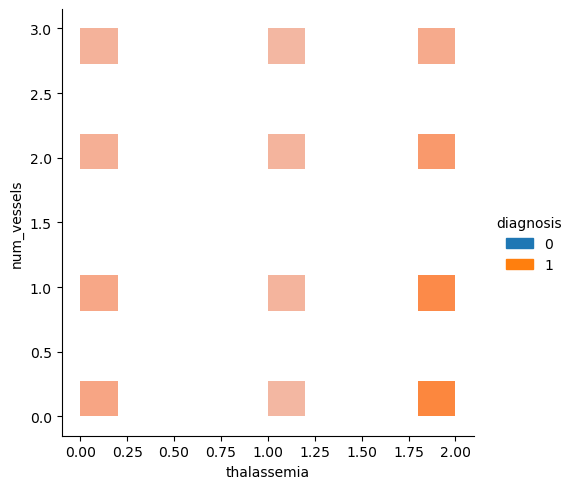

In [25]:
sns.displot(data=df, x="thalassemia",y="num_vessels",hue="diagnosis",kind="hist")


In [26]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


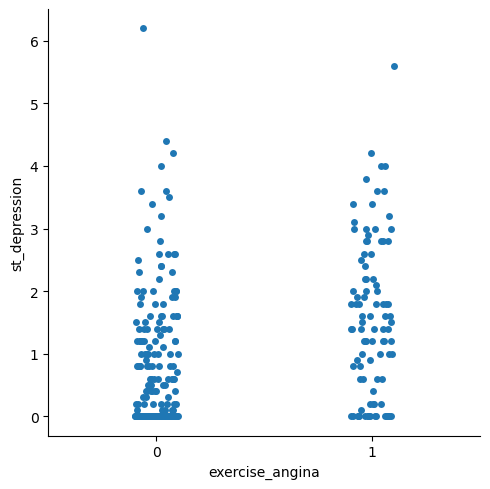

In [27]:
sns.catplot(data=df,x='exercise_angina',y='st_depression')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


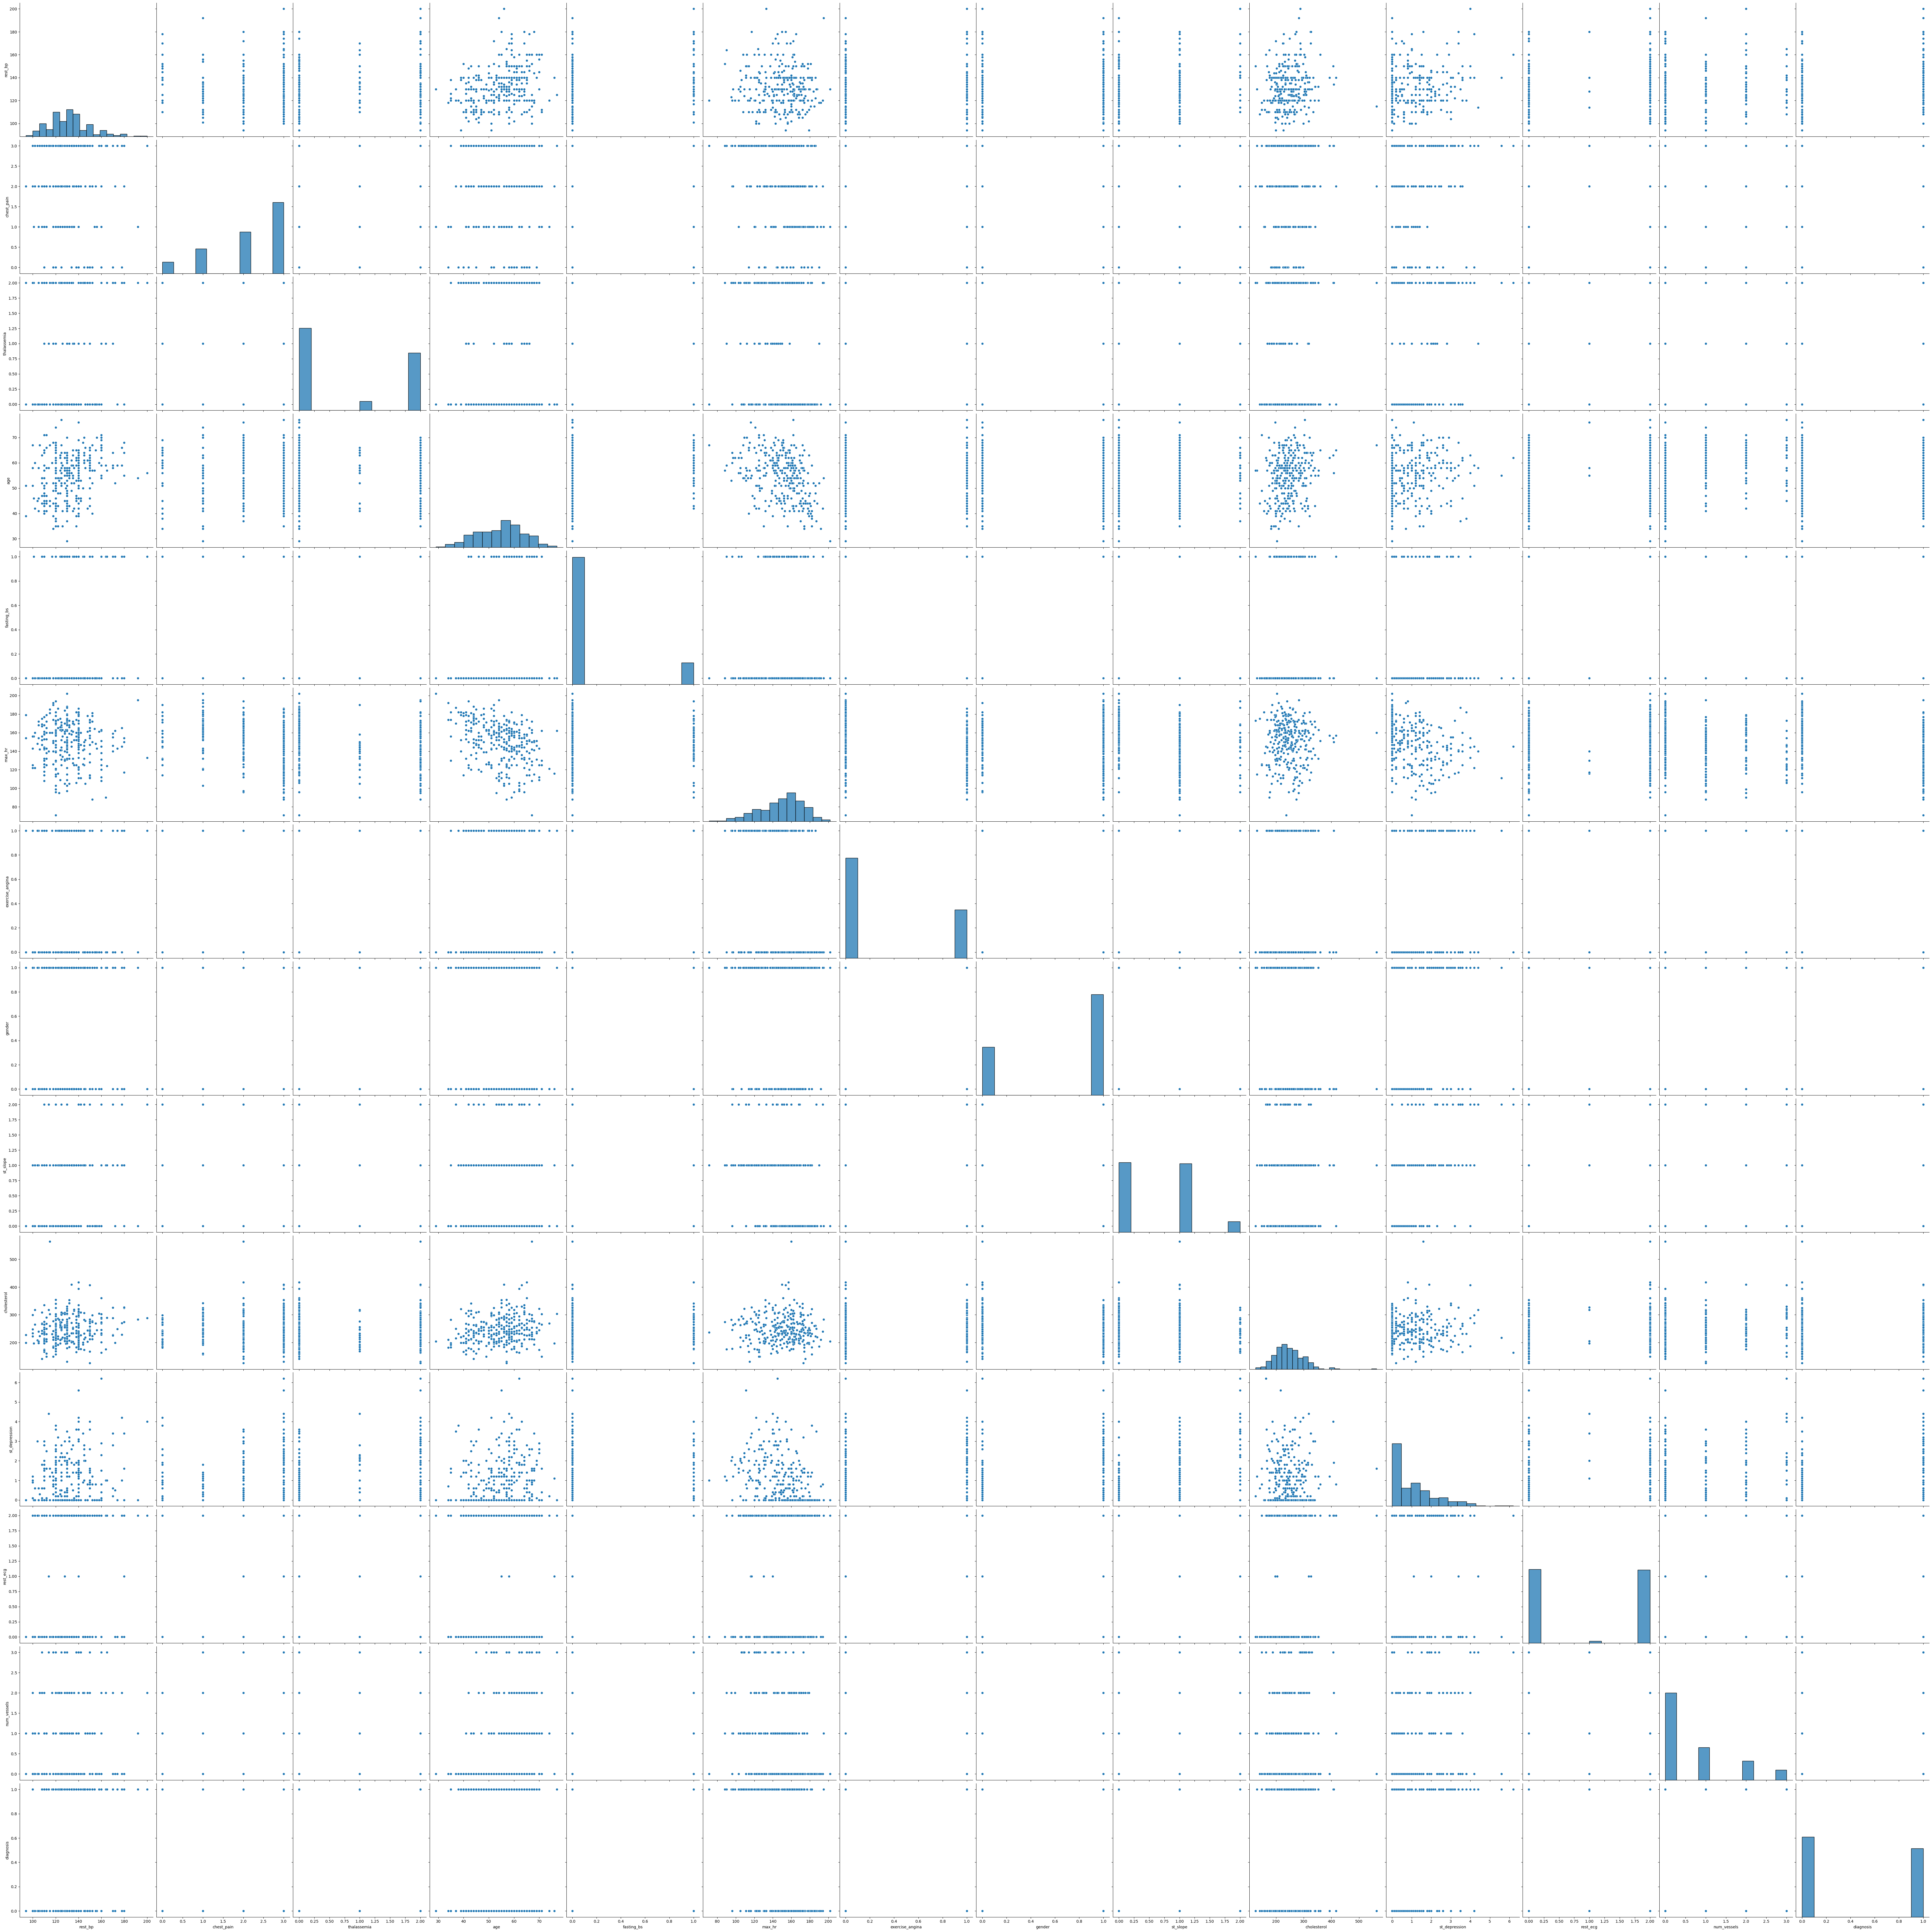

In [28]:
sns.pairplot(data=df, height=5, aspect=1)

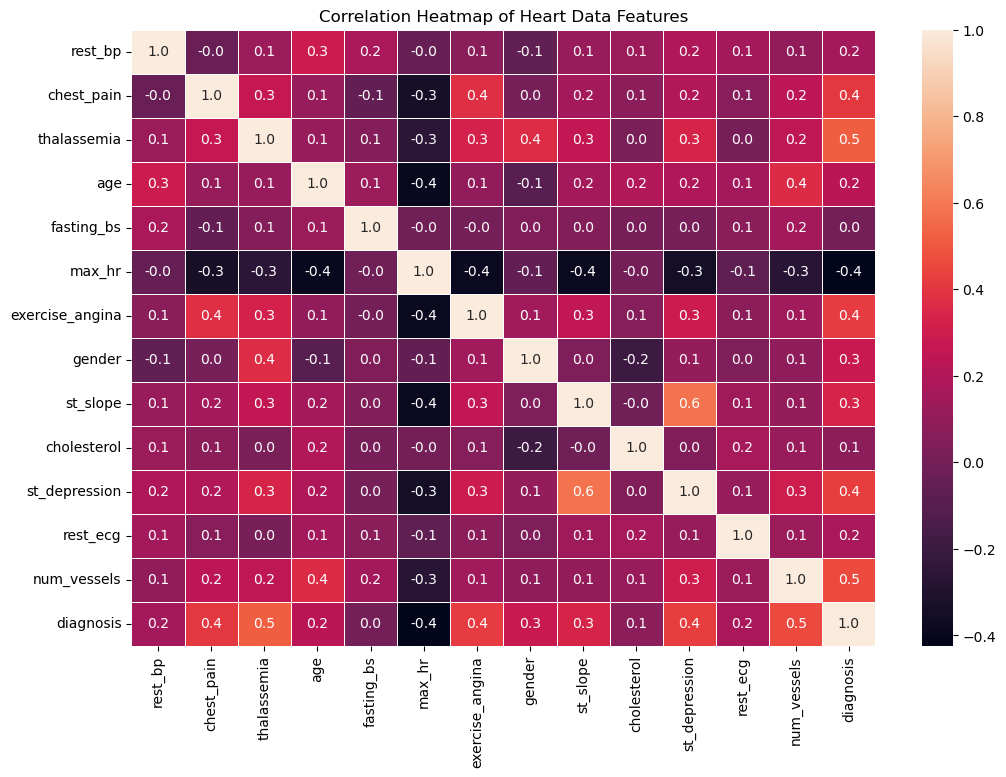

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5)
plt.title('Correlation Heatmap of Heart Data Features')
plt.show()

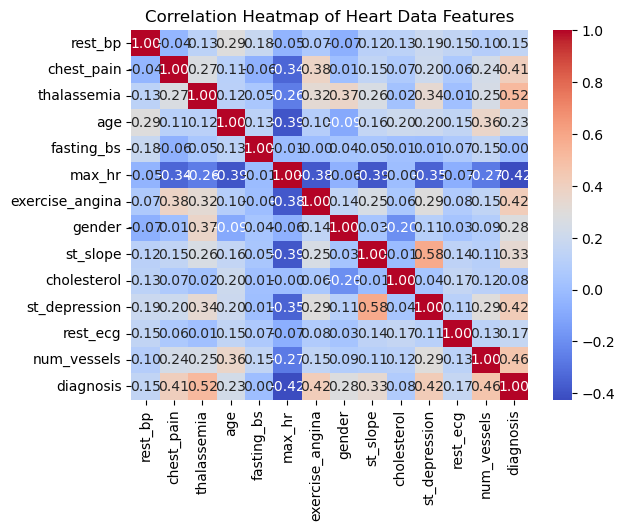

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Data Features')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


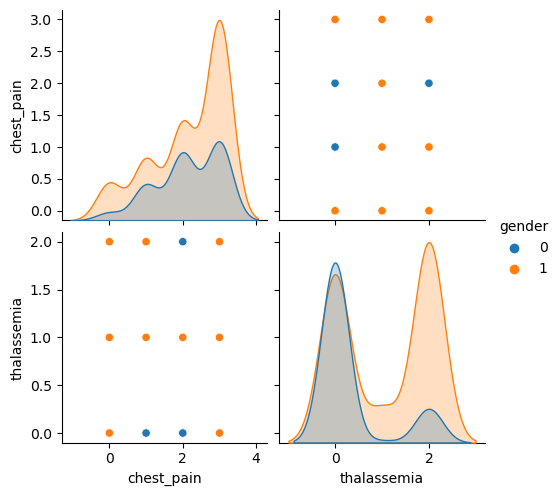

In [31]:
sns.pairplot(df, hue="gender", vars=["chest_pain", "thalassemia"])
plt.show()
